# Forest biomass estimation

By Emily E. Austin

Goal: To use the data extracted from satelite images (using R) to train a machine learning algorithm to predict forest biomass

# Prepare Data

In [120]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [121]:
#upload dataframe
df = pd.read_csv('Data/training_set.csv')
df.shape

(1092, 312)

In [122]:
#view the data
df.head()

,Unnamed: 0,ID,Ec_Rsrv,Locatin,Transct,Plot,Elevatn,Slope,Aspect,Frst_Ty,...,T19TFL_20170914T152621_B06_20m,T19TFL_20170914T152621_B07_20m,T19TFL_20170914T152621_B11_20m,T19TFL_20170914T152621_B12_20m,T19TFL_20170914T152621_B8A_20m,T19TFL_20170914T152621_SCL_20m,T19TFL_20170914T152621_TCI_20m,T19TFL_20170914T152621_VIS_20m,T19TFL_20170914T152621_WVP_20m.y,L_DCWD_.x
0,1,1,Bigelow,NaN,5,5,538,12.0,280.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2,2,Bigelow,NaN,2,6,535,22.0,326.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,3,3,Bigelow,NaN,2,1,427,5.0,26.0,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,4,4,Salmon Brook Lake,NaN,1,1,211,0.0,0.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,5,5,Salmon Brook Lake,NaN,1,2,212,0.0,0.0,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [123]:
#pulling out the column names and putting them in a list
col_names= []
for col in df.columns:
    col_names.append(col)

#making sure they appended to the list
print(col_names[22:100])

['T19TCJ_20170902T153549_AOT_20m', 'T19TCJ_20170902T153549_B02_20m', 'T19TCJ_20170902T153549_B03_20m', 'T19TCJ_20170902T153549_B04_20m', 'T19TCJ_20170902T153549_B05_20m', 'T19TCJ_20170902T153549_B06_20m', 'T19TCJ_20170902T153549_B07_20m', 'T19TCJ_20170902T153549_B11_20m', 'T19TCJ_20170902T153549_B12_20m', 'T19TCJ_20170902T153549_B8A_20m', 'T19TCJ_20170902T153549_SCL_20m', 'T19TCJ_20170902T153549_TCI_20m', 'T19TCJ_20170902T153549_VIS_20m', 'T19TCJ_20170902T153549_WVP_20m', 'T19TCK_20170902T153549_AOT_20m', 'T19TCK_20170902T153549_B02_20m', 'T19TCK_20170902T153549_B03_20m', 'T19TCK_20170902T153549_B04_20m', 'T19TCK_20170902T153549_B05_20m', 'T19TCK_20170902T153549_B06_20m', 'T19TCK_20170902T153549_B07_20m', 'T19TCK_20170902T153549_B11_20m', 'T19TCK_20170902T153549_B12_20m', 'T19TCK_20170902T153549_B8A_20m', 'T19TCK_20170902T153549_SCL_20m', 'T19TCK_20170902T153549_TCI_20m', 'T19TCK_20170902T153549_VIS_20m', 'T19TCK_20170902T153549_WVP_20m', 'T19TCL_20170902T153549_AOT_20m', 'T19TCL_20170

In [124]:
#deleting some extra columns
check = df['L_DCWD_.x'] - df['L_DCWD_']
print(check.describe())

check2 = df['T19TFL_20170914T152621_WVP_20m.x'] - df['T19TFL_20170914T152621_WVP_20m.y']
print(check2.describe())

count    1092.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64
count    7.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64


In [125]:
#removing completely blank columns
del df['L_DCWD_.x']
del df['T19TFL_20170914T152621_WVP_20m.y']
del df['Locatin']

In [126]:
#make a list of column names for each band
WVP_cols = [col for col in df.columns if 'WVP_20m' in col]
AOT_cols = [col for col in df.columns if 'AOT_20m' in col]
B02_cols = [col for col in df.columns if 'B02_20m' in col]
B03_cols = [col for col in df.columns if 'B03_20m' in col]
B04_cols = [col for col in df.columns if 'B04_20m' in col]
B05_cols = [col for col in df.columns if 'B05_20m' in col]
B06_cols = [col for col in df.columns if 'B06_20m' in col]
B11_cols = [col for col in df.columns if 'B11_20m' in col]
B12_cols = [col for col in df.columns if 'B12_20m' in col]
B8A_cols = [col for col in df.columns if 'B8A_20m' in col]
SCL_cols = [col for col in df.columns if 'SCL_20m' in col]
TCI_cols = [col for col in df.columns if 'TCI_20m' in col]
VIS_cols = [col for col in df.columns if 'VIS_20m' in col]

In [127]:
#create new df to hold median calculations
#used the first 20 columns as the base
med_df = pd.DataFrame(data=df.iloc[:, 1:19])
med_df

,ID,Ec_Rsrv,Transct,Plot,Elevatn,Slope,Aspect,Frst_Ty,Hrvst_H,Age_DBH,Lv_Bs_A,Liv_TPH,L_L_TPH,V_L_L_T,S_D_TPH,L_S_D_T,V_L_S_D,DCWD_Vl
0,1,Bigelow,5,5,538,12.0,280.0,120.0,1,61.0,48.155652,892.254974,0.000000,0.000000,0.000000,0.0,0.0,100.551750
1,2,Bigelow,2,6,535,22.0,326.0,120.0,1,108.0,45.489154,1011.222304,69.359859,9.876194,59.483665,0.0,0.0,15.223659
2,3,Bigelow,2,1,427,5.0,26.0,800.0,5,110.0,39.406938,475.869319,118.967330,0.000000,0.000000,0.0,0.0,29.347640
3,4,Salmon Brook Lake,1,1,211,0.0,0.0,120.0,5,111.0,71.271710,1606.058953,0.000000,0.000000,416.385654,0.0,0.0,84.984442
4,5,Salmon Brook Lake,1,2,212,0.0,0.0,120.0,1,118.0,52.670561,1427.607958,59.483665,0.000000,178.450995,0.0,0.0,65.636993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1088,Bradley Sunkhaze,13,3,73,0.0,0.0,120.0,5,42.0,27.773739,416.385654,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1088,1089,Bradley Sunkhaze,13,4,76,5.0,307.0,120.0,5,34.0,12.274035,416.385654,0.000000,0.000000,59.483665,0.0,0.0,13.067260
1089,1090,Bradley Sunkhaze,13,5,84,6.0,307.0,120.0,1,26.0,25.947938,951.738639,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1090,1091,Bradley Sunkhaze,18,4,123,21.5,298.0,800.0,5,NaN,13.127953,297.418325,19.752388,19.752388,0.000000,0.0,0.0,0.000000


In [128]:
#take the median for each band from the first dataframe
#and create a new column in the new dataframe
#using the median because cloud cover will create outliers
med_df['WVP_median'] = df[WVP_cols].median(axis=1)
med_df['AOT_median'] = df[AOT_cols].median(axis=1)
med_df['B02_median'] = df[B02_cols].median(axis=1)
med_df['B03_median'] = df[B03_cols].median(axis=1)
med_df['B04_median'] = df[B04_cols].median(axis=1)
med_df['B05_median'] = df[B05_cols].median(axis=1)
med_df['B06_median'] = df[B06_cols].median(axis=1)
med_df['B11_median'] = df[B11_cols].median(axis=1)
med_df['B12_median'] = df[B12_cols].median(axis=1)
med_df['B8A_median'] = df[B8A_cols].median(axis=1)
med_df['SCL_median'] = df[SCL_cols].median(axis=1)
med_df['TCI_median'] = df[TCI_cols].median(axis=1)
med_df['VIS_median'] = df[VIS_cols].median(axis=1)

In [129]:
#hmmm, still have nulls
med_df.isnull().values.sum()

169

In [130]:
#what cols are the nulls in?
med_df.isnull().sum()

ID             0
Ec_Rsrv        0
Transct        0
Plot           0
Elevatn        0
Slope          6
Aspect        26
Frst_Ty        1
Hrvst_H        0
Age_DBH       84
Lv_Bs_A        0
Liv_TPH        0
L_L_TPH        0
V_L_L_T        0
S_D_TPH        0
L_S_D_T        0
V_L_S_D        0
DCWD_Vl        0
WVP_median     4
AOT_median     4
B02_median     4
B03_median     4
B04_median     4
B05_median     4
B06_median     4
B11_median     4
B12_median     4
B8A_median     4
SCL_median     4
TCI_median     4
VIS_median     4
dtype: int64

In [131]:
med_df.shape

(1092, 31)

In [132]:
#calculate NDVI
med_df['NDVI_median'] = (med_df['B8A_median']-med_df['B04_median'])/(med_df['B8A_median']+med_df['B04_median'])

In [133]:
#extracting these values into a list for training
#and removing nulls
median_cols = [col for col in med_df.columns if 'median' in col]
print(median_cols)

['WVP_median', 'AOT_median', 'B02_median', 'B03_median', 'B04_median', 'B05_median', 'B06_median', 'B11_median', 'B12_median', 'B8A_median', 'SCL_median', 'TCI_median', 'VIS_median', 'NDVI_median']


In [134]:
na_cols = ["Slope", "Aspect", "Frst_Ty", "Age_DBH"]
# I'm not planning on using these columns but I'll fill them with the mean in case I want to look at them

In [135]:
med_df[na_cols]=med_df[na_cols].fillna(df.mean().iloc[0])
med_df[median_cols]=med_df[median_cols].fillna(df.mean().iloc[0])

/var/folders/_3/3qrdy8394_54yc_s6bwkjvhc0000gn/T/ipykernel_30905/3996733577.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_df[na_cols]=med_df[na_cols].fillna(df.mean().iloc[0])
/var/folders/_3/3qrdy8394_54yc_s6bwkjvhc0000gn/T/ipykernel_30905/3996733577.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_df[median_cols]=med_df[median_cols].fillna(df.mean().iloc[0])


In [136]:
#ensure no nulls remain in the training set
med_df.isnull().sum()

ID             0
Ec_Rsrv        0
Transct        0
Plot           0
Elevatn        0
Slope          0
Aspect         0
Frst_Ty        0
Hrvst_H        0
Age_DBH        0
Lv_Bs_A        0
Liv_TPH        0
L_L_TPH        0
V_L_L_T        0
S_D_TPH        0
L_S_D_T        0
V_L_S_D        0
DCWD_Vl        0
WVP_median     0
AOT_median     0
B02_median     0
B03_median     0
B04_median     0
B05_median     0
B06_median     0
B11_median     0
B12_median     0
B8A_median     0
SCL_median     0
TCI_median     0
VIS_median     0
NDVI_median    0
dtype: int64

# Training models

## Decision Tree Regressor

In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [138]:
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1,random_state=3)

In [139]:
X = med_df[median_cols]
y = med_df.Lv_Bs_A
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=3)

In [140]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
mse_dt = MSE(y_test,y_pred)
rmse_dt=mse_dt**(1/2)
r2_dt = dt.score(X_test,y_test)

model_rmse['DecisionTreeRegressor']=rmse_dt

In [141]:
dt.score(X_test, y_test)

-0.013830854587269625

In [187]:
#Data Frame to store model scores
model_scores = pd.DataFrame([[rmse_dt,r2_dt]],columns=['RMSE','Rsq'], index = ['DecisionTreeRegressor'])
model_scores

,RMSE,Rsq
DecisionTreeRegressor,15.499501,-0.013831


In [188]:
from sklearn.model_selection import learning_curve

train_size_abs, train_scores, test_scores = learning_curve(
dt, X, y, train_sizes =[0.3,0.6,0.9])

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

261 samples were used to train the model
The average train accuracy is 0.26
The average test accuracy is -0.15
523 samples were used to train the model
The average train accuracy is 0.18
The average test accuracy is -0.10
785 samples were used to train the model
The average train accuracy is 0.13
The average test accuracy is -0.09


In [189]:
#looks like my model could improve with more data

## random forest regressor

In [190]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()

In [191]:
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
mse_RFR = MSE(y_test, y_pred)
print(mse_RFR**(1/2))
print(RFR.score(X_test,y_test))


14.49666229586932
0.07619846072949654


In [192]:
y.describe()
#does not really seem like a good model considering the data

count    1092.000000
mean       24.143766
std        15.478300
min         0.000000
25%        13.105843
50%        23.172891
75%        32.853202
max       109.615291
Name: Lv_Bs_A, dtype: float64

### grid search for parameters

In [193]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {
    #"n_estimators" : [1000,10000]
    #"max_depth": [1,3,5]
    "min_samples_split":[2,4,8]
}

est = RFR
search = GridSearchCV(est, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.109):
{'min_samples_split': 4}
CPU times: user 8.39 s, sys: 163 ms, total: 8.56 s
Wall time: 9.45 s


In [194]:
RFR = RandomForestRegressor(n_estimators=1000,max_depth=4,min_samples_split=8)

In [195]:
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
mse_RFR = MSE(y_test, y_pred)
rmse=mse_RFR**(1/2)
r2=RFR.score(X_test,y_test)
print(rmse_RFR)
#not much change from above when I use n_estimators =1000

newDF = pd.DataFrame([[rmse,r2]],columns=['RMSE','Rsq'], index = ['RandomForestRegressor'])
model_scores = model_scores.append(newDF)
model_scores

14.842024723474754


/var/folders/_3/3qrdy8394_54yc_s6bwkjvhc0000gn/T/ipykernel_30905/1697301981.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append(newDF)


,RMSE,Rsq
DecisionTreeRegressor,15.499501,-0.013831
RandomForestRegressor,14.636072,0.058345


In [151]:
RFR.score(X_train, y_train)

0.2904349452226913

In [196]:
train_size_abs, train_scores, test_scores = learning_curve(
RFR, X, y, train_sizes =[0.3,0.6,0.9])

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

261 samples were used to train the model
The average train accuracy is 0.46
The average test accuracy is -0.15
523 samples were used to train the model
The average train accuracy is 0.34
The average test accuracy is -0.04
785 samples were used to train the model
The average train accuracy is 0.29
The average test accuracy is -0.03


In [153]:
#definitely seems I could benefit from more samples...

it's easy to make the R2 for training data go down but impossible to make the score for test data go up. 

In [197]:
RFR = RandomForestRegressor(n_estimators=1000,max_depth=20)

In [198]:
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
mse_RFR = MSE(y_test, y_pred)
rmse=mse_RFR**(1/2)
r2=RFR.score(X_test, y_test)

newDF = pd.DataFrame([[rmse,r2]],columns=['RMSE','Rsq'], index = ['RandomForestRegressor2'])
model_scores = model_scores.append(newDF)
model_scores

/var/folders/_3/3qrdy8394_54yc_s6bwkjvhc0000gn/T/ipykernel_30905/2066823324.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append(newDF)


,RMSE,Rsq
DecisionTreeRegressor,15.499501,-0.013831
RandomForestRegressor,14.636072,0.058345
RandomForestRegressor2,14.462728,0.080518


In [156]:
RFR.score(X_train,y_train)

0.8623545532933459

Changing max depth doesn't fix the disparity between train and test. 

### Standard Scaler 

In [157]:
med_df.describe()
#They definitely have different scales so I will try scaling the data
#Use for a non-forest model like ridge or linear regression

,ID,Transct,Plot,Elevatn,Slope,Aspect,Frst_Ty,Hrvst_H,Age_DBH,Lv_Bs_A,...,B04_median,B05_median,B06_median,B11_median,B12_median,B8A_median,SCL_median,TCI_median,VIS_median,NDVI_median
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,...,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,546.500000,11.525641,3.535714,301.141941,18.508471,156.784799,352.331960,1.337912,116.709707,24.143766,...,177.664148,600.278388,1876.455014,1045.401328,452.565896,2491.788194,5.271635,20.585852,8.340621,12.854860
std,315.377552,16.240693,2.820900,219.310964,43.691485,129.643394,317.313098,1.872741,130.369460,15.478300,...,94.139270,240.597240,768.818850,456.503070,195.594926,1046.094645,32.849501,33.274217,34.678838,80.033474
min,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,273.750000,2.000000,2.000000,112.000000,4.500000,32.000000,120.000000,0.000000,55.000000,13.105843,...,97.625000,394.968750,1263.250000,696.750000,298.750000,1690.187500,2.000000,10.500000,1.000000,0.849372
50%,546.500000,5.000000,3.000000,295.000000,10.000000,150.000000,120.000000,1.000000,78.000000,23.172891,...,168.187500,626.250000,1863.625000,997.000000,440.812500,2436.625000,4.000000,18.000000,2.000000,0.881145
75%,819.250000,12.250000,4.000000,412.250000,21.000000,254.000000,800.000000,1.000000,117.250000,32.853202,...,224.625000,778.687500,2478.500000,1374.812500,596.125000,3273.093750,4.000000,23.750000,4.000000,0.901073
max,1092.000000,69.000000,27.000000,1095.000000,546.500000,546.500000,960.000000,5.000000,546.500000,109.615291,...,623.250000,1354.500000,4194.000000,2498.250000,1185.250000,5827.000000,546.500000,546.500000,546.500000,546.500000


In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Below two lines are identical to X_trans = scaler.fit_transform(X)
scaler.fit(X)         
X_trans = scaler.transform(X)  

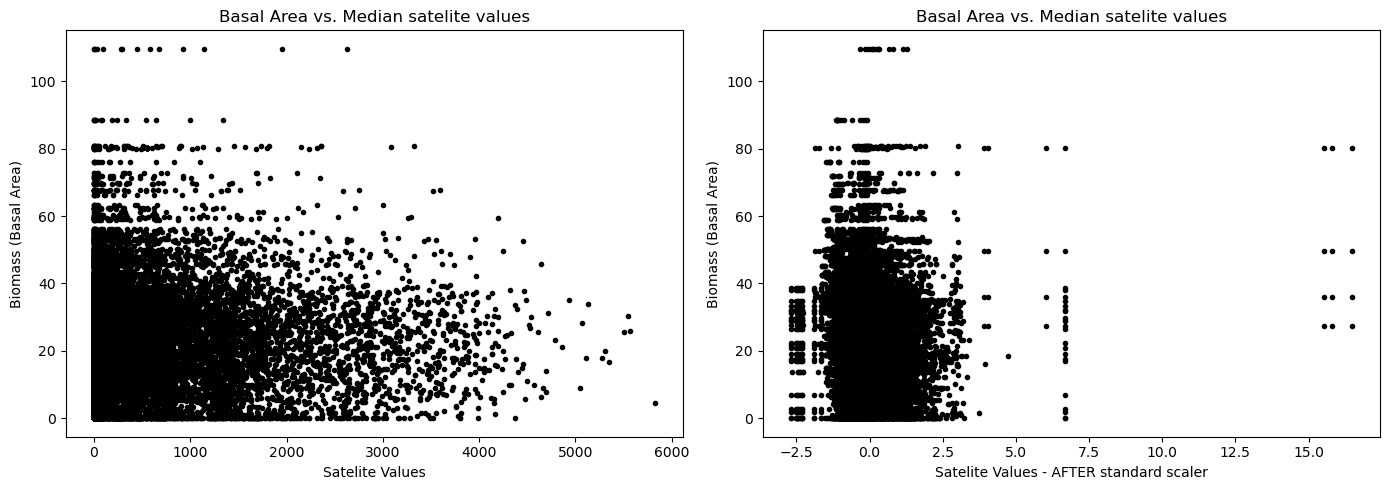

In [159]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(X, y, '.',color='k')
plt.title('Basal Area vs. Median satelite values')
plt.xlabel('Satelite Values')
plt.ylabel('Biomass (Basal Area)')

plt.subplot(1, 2, 2)
plt.plot(X_trans, y, '.',color='k')
plt.title('Basal Area vs. Median satelite values')
plt.xlabel('Satelite Values - AFTER standard scaler')
plt.ylabel('Biomass (Basal Area)')

fig.tight_layout()
#not sure if this is actually an improvement based on looking.

# Ridge Regression

In [199]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_trans,y, test_size=0.3, random_state=3)

ridge=Ridge(alpha = 0.1)

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
r2 = r2_score(y_test,y_pred)

mse_RR = MSE(y_test, y_pred)
rmse=mse_RR**(1/2)

newDF = pd.DataFrame([[rmse,r2]],columns=['RMSE','Rsq'], index = ['RidgeRegression'])
model_scores = model_scores.append(newDF)
model_scores


/var/folders/_3/3qrdy8394_54yc_s6bwkjvhc0000gn/T/ipykernel_30905/4132003417.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append(newDF)


,RMSE,Rsq
DecisionTreeRegressor,15.499501,-0.013831
RandomForestRegressor,14.636072,0.058345
RandomForestRegressor2,14.462728,0.080518
RidgeRegression,15.083134,-0.000059


In [161]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

est = ridge
search = GridSearchCV(est, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.035):
{'alpha': 0.1}
CPU times: user 121 ms, sys: 8.47 ms, total: 130 ms
Wall time: 94.3 ms


# SVM 

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X_trans,y, test_size=0.3, random_state=3)

regr = make_pipeline(StandardScaler(), SVR(kernel='linear',C=25, epsilon=0.2))
regr.fit(X_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=25, epsilon=0.2, kernel='linear'))])

In [201]:
y_pred = regr.predict(X_test)


mse_SVM = MSE(y_test, y_pred)
rmse_=mse_SVM**(1/2)
r2 = r2_score(y_test,y_pred)
#attempt 1 r2 = -36
#attempt 2 r2 = -23 (changed kernel to linear)
#attempt 3 r2 = -6 (C=1150)
#attempt 4 r2 = -11 (grid search with scaled data, C = 25)


newDF = pd.DataFrame([[rmse,r2]],columns=['RMSE','Rsq'], index = ['SVM'])
model_scores = model_scores.append(newDF)
model_scores

/var/folders/_3/3qrdy8394_54yc_s6bwkjvhc0000gn/T/ipykernel_30905/4238563496.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append(newDF)


,RMSE,Rsq
DecisionTreeRegressor,15.499501,-0.013831
RandomForestRegressor,14.636072,0.058345
RandomForestRegressor2,14.462728,0.080518
RidgeRegression,15.083134,-0.000059
SVM,15.083134,0.026819


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_trans,y, test_size=0.3, random_state=3)

param_grid = {
    "C": [20,25,30]
}
svr = SVR()
est = svr

search = GridSearchCV(est, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.105):
{'C': 25}


# Back to Random Forest and Try Gradient Boosting

# Gradient Boost

In [202]:
# GradientBoostingRegressor
from sklearn import ensemble

gradient_reg = ensemble.GradientBoostingRegressor(learning_rate =0.1, 
                                                  n_estimators=100,subsample=0.85)

gradient_reg.fit(X_train,y_train)
y_pred = gradient_reg.predict(X_test)

mse_GBrandomforest = MSE(y_test, y_pred)
rmse=mse_RFR**(1/2)
r2 = r2_score(y_test,y_pred)

#default loss is best R2 = -2.9
#after gridsearch, R2 is worse. -5.15
#the more I try to improve things the worse they get R2 -9
# at least it's going up R2 = -6.25
#back to defaults for learning_rate and n_estimators
#subsample = 0.8 R2 = -2.8

newDF = pd.DataFrame([[rmse,r2]],columns=['RMSE','Rsq'], index = ['GradientBoostRFR'])
model_scores = model_scores.append(newDF)
model_scores

/var/folders/_3/3qrdy8394_54yc_s6bwkjvhc0000gn/T/ipykernel_30905/3637621921.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append(newDF)


,RMSE,Rsq
DecisionTreeRegressor,15.499501,-0.013831
RandomForestRegressor,14.636072,0.058345
RandomForestRegressor2,14.462728,0.080518
RidgeRegression,15.083134,-0.000059
SVM,15.083134,0.026819
GradientBoostRFR,14.462728,0.033524


In [203]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {
    #"learning_rate" : [0.05, 0.1, 1],
    #"n_estimators" : [40,65,100,200],
    "subsample" : [0.75,0.8,0.85,1]
}

est = gradient_reg
search = GridSearchCV(est, param_grid, cv=5)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.088):
{'subsample': 0.85}
CPU times: user 4.67 s, sys: 77.1 ms, total: 4.75 s
Wall time: 5.23 s


## Figures for model comparison

In [204]:
model_scores

,RMSE,Rsq
DecisionTreeRegressor,15.499501,-0.013831
RandomForestRegressor,14.636072,0.058345
RandomForestRegressor2,14.462728,0.080518
RidgeRegression,15.083134,-0.000059
SVM,15.083134,0.026819
GradientBoostRFR,14.462728,0.033524


Text(0, 0.5, 'RMSE')

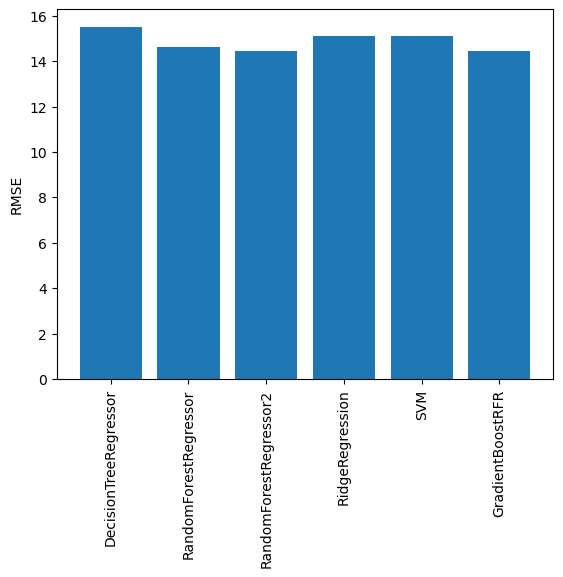

In [205]:
import matplotlib.pyplot as plt

x=model_scores.index
y=model_scores['RMSE']

plt.bar(x,y)
plt.xticks(rotation = 90)
plt.ylabel("RMSE")

Text(0, 0.5, 'Rsq')

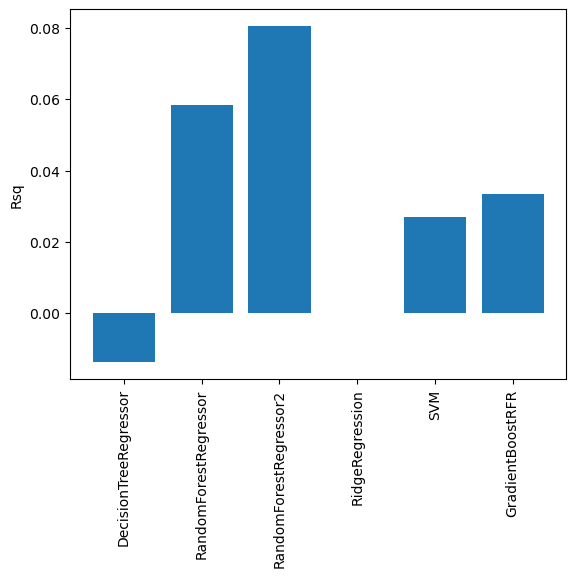

In [206]:
x=model_scores.index
y=model_scores['Rsq']

plt.bar(x,y)
plt.xticks(rotation = 90)
plt.ylabel("Rsq")